# Credit Card Lab for Unsupervised Machine Learning

Notebook Author: Tan Song Xin Alastair

Dataset Source: Kaggle

Dataset Source URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Accessed Date: 14 February 2025

## Python Version: 3.13.2

### Requirements:  
anyio==4.8.0  
argon2-cffi==23.1.0  
argon2-cffi-bindings==21.2.0  
arrow==1.3.0  
asttokens==3.0.0  
async-lru==2.0.4  
attrs==25.1.0  
babel==2.17.0  
beautifulsoup4==4.13.3  
bleach==6.2.0  
certifi==2025.1.31  
cffi==1.17.1  
charset-normalizer==3.4.1  
comm==0.2.2  
contourpy==1.3.1  
cycler==0.12.1  
debugpy==1.8.12  
decorator==5.1.1  
defusedxml==0.7.1  
executing==2.2.0  
fastjsonschema==2.21.1  
fonttools==4.56.0  
fqdn==1.5.1  
h11==0.14.0  
httpcore==1.0.7  
httpx==0.28.1  
idna==3.10  
ipykernel==6.29.5  
ipython==8.32.0  
ipywidgets==8.1.5  
isoduration==20.11.0  
jedi==0.19.2  
Jinja2==3.1.5  
joblib==1.4.2  
json5==0.10.0  
jsonpointer==3.0.0  
jsonschema==4.23.0  
jsonschema-specifications==2024.10.1  
jupyter==1.1.1  
jupyter-console==6.6.3  
jupyter-events==0.12.0  
jupyter-lsp==2.2.5  
jupyter_client==8.6.3  
jupyter_core==5.7.2  
jupyter_server==2.15.0  
jupyter_server_terminals==0.5.3  
jupyterlab==4.3.5  
jupyterlab_pygments==0.3.0  
jupyterlab_server==2.27.3  
jupyterlab_widgets==3.0.13  
kiwisolver==1.4.8  
lab==8.4  
MarkupSafe==3.0.2  
matplotlib==3.10.0  
matplotlib-inline==0.1.7  
mistune==3.1.1  
nbclient==0.10.2  
nbconvert==7.16.6  
nbformat==5.10.4  
nest-asyncio==1.6.0  
notebook==7.3.2  
notebook_shim==0.2.4  
numpy==2.2.3  
overrides==7.7.0  
packaging==24.2  
pandas==2.2.3  
pandocfilters==1.5.1  
parso==0.8.4  
pexpect==4.9.0  
pillow==11.1.0  
platformdirs==4.3.6  
prometheus_client==0.21.1  
prompt_toolkit==3.0.50  
psutil==7.0.0  
ptyprocess==0.7.0  
pure_eval==0.2.3  
pycparser==2.22  
Pygments==2.19.1  
pyparsing==3.2.1  
python-dateutil==2.9.0.post0  
python-json-logger==3.2.1  
pytz==2025.1  
PyYAML==6.0.2  
pyzmq==26.2.1  
referencing==0.36.2  
requests==2.32.3  
rfc3339-validator==0.1.4  
rfc3986-validator==0.1.1  
rpds-py==0.22.3  
scikit-learn==1.6.1  
scipy==1.15.1  
seaborn==0.13.2  
Send2Trash==1.8.3  
setuptools==75.8.0  
simplejson==3.19.3  
six==1.17.0  
sniffio==1.3.1  
soupsieve==2.6  
stack-data==0.6.3  
terminado==0.18.1  
threadpoolctl==3.5.0  
tinycss2==1.4.0  
tornado==6.4.2  
tqdm==4.67.1  
traitlets==5.14.3  
txt2tags==3.9  
types-python-dateutil==2.9.0.20241206  
typing_extensions==4.12.2  
tzdata==2025.1  
uri-template==1.3.0  
urllib3==2.3.0  
wcwidth==0.2.13  
webcolors==24.11.1  
webencodings==0.5.1  
websocket-client==1.8.0  
widgetsnbextension==4.0.13  

## Goal:

The goal of this project is to experiment on ways to perform dimensionality reduction on the Credit Card dataset, and graph the results comparing both the cosine similarity of the data before and after the changes, and also to see how much the explained variance ratio changes as a result of each time of dimensionality reduction technique.

The change in variance shows how much the newly transformed data still represents the whole sample. If the variance of the newly transformed data is high, it can be assumed that the dimensionality reduction in reducing the number of columns is worth the cost of both time taken, and how well the data still represents the original dataset. Similarity compares the change of distance between points before and after the transformation. A high similarity means that the dimensionality reduction preserves the differences between data points that allows for meaningful clustering and other machine learning techniques.

We want a minimum of 95% variance and 95% similarity after the transformation, although higher values are obviously better. Lower values may be considered if no other options are available, or if the data have some stochastic quality that makes it unreliable.

The 3 techniques to be tested are Principal Component Analysis (PCA), Gaussian Random Projection, and Feature Agglomeration.

In [1]:
import pandas as pd
import numpy as np
import sklearn, statistics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import kstest
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

#Get rid of warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Data Engineering/Cleanup

First, we load the data and check the records for invalid records or any other anomalies.

In [2]:
# Check if there are null/na values to deal with
filename = "CC GENERAL.csv"

pd_dataset = pd.read_csv(filename)
print("General Data Check:")
print(pd_dataset.head())
print("Number of Rows:", len(pd_dataset))

print("NA/NULL count:")
print(pd_dataset.isna().sum())

General Data Check:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1               

## Data Explanation:

**CUST_ID** : Identification of Credit Card holder. Should be dropped when performing clustering, machine learning training, or dimensionality reduction

**BALANCE** : Balance amount left in their account to make purchases

**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment

**CASH_ADVANCE** : Cash in advance given by the user

**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid

**CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX**: Numbe of purchase transactions made

**CREDIT_LIMIT**: Limit of Credit Card for user

**PAYMENTS**: Amount of Payment done by user

**MINIMUM_PAYMENTS**: Minimum amount of payments made by user

**PRCFULLPAYMENT**: Percent of full payment paid by user

**TENURE**: Tenure of credit card service for user : Identification of Credit Card holder (Categorical)

**BALANCE**: Balance amount left in their account to make purchases  

**BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES**: Amount of purchases made from account

**ONEOFF_PURCHASES**: Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES**: Amount of purchase done in installment

**CASH_ADVANCE**: Cash in advance given by the user

**PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid

**CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX**: Numbe of purchase transactions made

**CREDIT_LIMIT**: Limit of Credit Card for user

**PAYMENTS**: Amount of Payment done by user

**MINIMUM_PAYMENTS**: Minimum amount of payments made by user

**PRCFULLPAYMENT**: Percent of full payment paid by user

**TENURE**: Tenure of credit card service for user

## Data Cleaning / Handling NaN values

For the MINIMUM_PAYMENTS column, it can be reasonably assumed that any record with no value inside means that there's no minimum payment value. So, to impute the data, NaN records are set to 0.

For the CREDIT_LIMIT column, a KNN imputer is used, instead, as it is reasonable to assume that banks will set credit limits to certain predefined thresholds based on the customer's other values.

CUST_ID is not used in imputation as it is an ID, and may cause data leakage in the future.

In [3]:
print("Number of NaNs inside Credit Limit:", len(pd_dataset.loc[pd_dataset["CREDIT_LIMIT"].isna()])) # Row 5203
print("Number of NaNs inside Minimum Payments:", len(pd_dataset.loc[pd_dataset["MINIMUM_PAYMENTS"].isna()]))

pd_dataset.loc[pd_dataset["MINIMUM_PAYMENTS"].isna(), "MINIMUM_PAYMENTS"] = 0.00
print("Number of NaNs inside Minimum Payments after setting to 0:", len(pd_dataset.loc[pd_dataset["MINIMUM_PAYMENTS"].isna()]))

# Minimum payments will be imputed as 0.
# Do data imputation. Since Credit Limit is generally similar values, will use KNN Imputer

pd_dataset_clean = pd_dataset[["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", \
                               "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE"]]

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")
pd_dataset_clean = pd.DataFrame(imputer.fit_transform(pd_dataset_clean), columns=pd_dataset_clean.columns)

print("Number of NaNs inside Credit Limit:", len(pd_dataset_clean.loc[pd_dataset_clean["CREDIT_LIMIT"].isna()])) # Row 5203
print(pd_dataset_clean.iloc[5202])

Number of NaNs inside Credit Limit: 1
Number of NaNs inside Minimum Payments: 313
Number of NaNs inside Minimum Payments after setting to 0: 0
Number of NaNs inside Credit Limit: 0
BALANCE                        216.705656
BALANCE_FREQUENCY                1.000000
PURCHASES                     1442.900000
ONEOFF_PURCHASES               424.600000
INSTALLMENTS_PURCHASES        1018.300000
CASH_ADVANCE                     0.000000
PURCHASES_FREQUENCY              1.000000
ONEOFF_PURCHASES_FREQUENCY       0.666667
CASH_ADVANCE_FREQUENCY           0.000000
CASH_ADVANCE_TRX                 0.000000
PURCHASES_TRX                   29.000000
CREDIT_LIMIT                  4000.000000
PAYMENTS                      1111.898226
MINIMUM_PAYMENTS                87.775306
PRC_FULL_PAYMENT                 1.000000
TENURE                           6.000000
Name: 5202, dtype: float64


UsageError: Line magic function `%%plt.show()` not found.


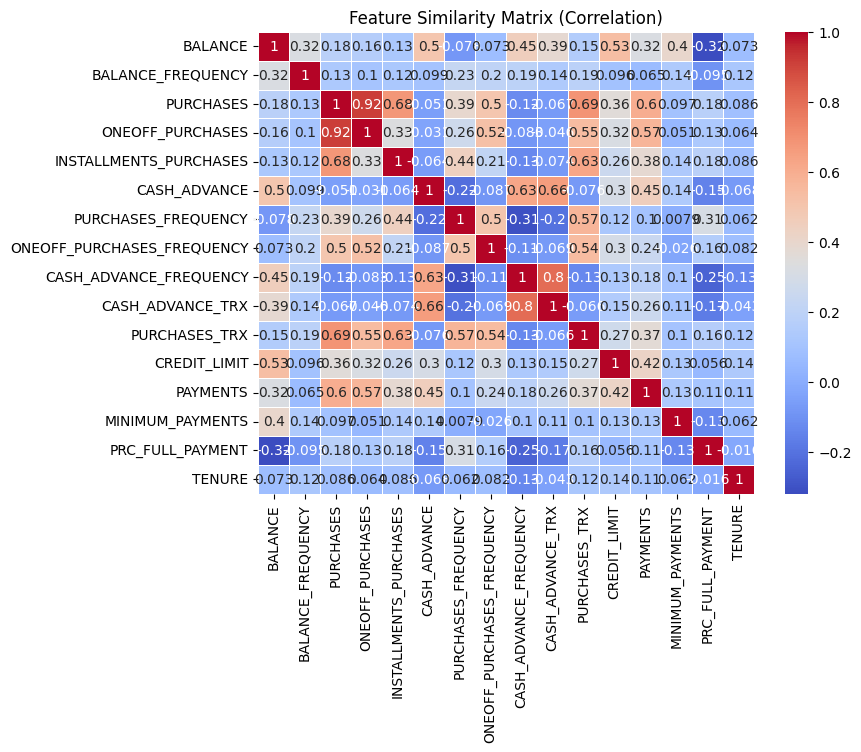

In [4]:
# Compute similarity matrix (correlation in this case)
similarity_matrix = pd_dataset[["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", \
                               "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Similarity Matrix (Correlation)")
%%plt.show()

## Correlation Analysis

The values with the strongest correlations are between PURCHASES and PURCHASES_TRX (0.69), and CASH_ADVANCE_TRX and CASH_ADVANCE (0.66). The purpose of dimensionality reduction is to reduce the number of data columns while preserving data similarity and data variance, so these cases should be well-handled by our experiments.

## Principal Component Analysis (PCA)

15 runs of PCA are performed, starting with n_components = 15 (reducing the number of columns by 1) down to n_components = 2 (resulting in a 2D graph). Having n_components = 2 is the most desirable for the purposes of creating a visually interpretable 2D clusterplot, but may cause an unacceptable loss of variance and similarity.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

for i in range(15, 1, -1):
    pca = PCA(n_components=i)
    pd_pca = pca.fit_transform(pd_dataset_clean)    

    # Approximate explained variance ratio    
    print(f"PCA with {i} components variance:", pca.explained_variance_ratio_.sum())        

    # Compute pairwise distances before and after projection
    orig_dist = euclidean_distances(pd_dataset_clean)
    proj_dist = euclidean_distances(pd_pca)
    
    # Compare distance matrices
    correlation = np.corrcoef(orig_dist.ravel(), proj_dist.ravel())[0, 1]
    print(f"Correlation between original and projected distances: {correlation:.8f}")

## Time Taken For PCA/GRP/Feature Agglomeration

This time taken excludes the time taken to perform the variance/similarity calculations. Code was run on an AMD Ryzen 9 7950X3D.

**PCA Time Taken**: 90.1ms for 15 runs  
**GRP Time Taken**: 86.2ms for 15 runs  
**Feature Agglomeration Time Taken**: 198ms for 15 runs  

%%time was used to get the data.

In [ ]:
components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
variance = [0.6530, 0.7932, 0.9067, 0.9548, 0.9819, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
distance  = [0.9253, 0.9851, 0.9970, 0.9987, 0.9993, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot heatmap
ax[0].plot(components, distance)
ax[0].set_title("Distance per component (PCA)")
ax[0].set_xlabel("Component")
ax[0].set_ylabel("Distance")

# Plot heatmap
ax[1].plot(components, variance)
ax[1].set_title("Variance per component (PCA)")
ax[1].set_xlabel("Component")
ax[1].set_ylabel("Variance")
plt.show()

## PCA Variance / Similarity per n_component:

|n_component|Variance|Similarity|
|----:|----:|----:|
|2|0.6530|0.9253|
|3|0.7932|0.9851|
|4|0.9067|0.9970|
|5|0.9548|0.9987|
|6|0.9819|0.9993|
|7|1.0000|1.0000|
|8|1.0000|1.0000|
|9|1.0000|1.0000|
|10|1.0000|1.0000|
|11|1.0000|1.0000|
|12|1.0000|1.0000|
|13|1.0000|1.0000|
|14|1.0000|1.0000|
|15|1.0000|1.0000|

## Analysis:

The variance and similarity of the dataset post PCA converges to 1.0 (or very close to 1.0 when rounded up after 4 decimal places), at n_components = 7, but 5 and 6 are also have acceptable decreases in variance of less than 5%, while maintaining very high data similarity. So, a PCA dimensionality reduction set at n=7 can be done for a cautious reduction in the number of columns, but n=5 or n=6 can be used for more aggressive, faster model training at the cost of some variance.

## Gaussian Random Projection

Gaussian Random Projection reduces the dimensionality by projecting the original input space on a randomly generated matrix. This random method does not perform any maximisation of values, but takes up less time to run as compared to other techniques.

In [ ]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

for i in range(15, 1, -1):
    # Apply Gaussian Random Projection
    grp = GaussianRandomProjection(n_components=i, random_state=42)
    pd_grp = grp.fit_transform(pd_dataset_clean)
    
    # Compute pairwise distances before and after projection
    orig_dist = euclidean_distances(pd_dataset_clean)
    proj_dist = euclidean_distances(pd_grp)
    
    # Compare distance matrices
    correlation = np.corrcoef(orig_dist.ravel(), proj_dist.ravel())[0, 1]
    print(f"Correlation between original and projected distances with {i} components: {correlation:.8f}")

    # Approximate explained variance ratio
    explained_variance_ratio = np.var(pd_grp, axis=0).sum() / np.var(pd_dataset_clean, axis=0).sum()
    print(f"Approximate explained variance: {explained_variance_ratio:.8f}")

In [ ]:
components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
variance = [0.7107, 0.9854, 0.8303, 0.7619, 0.6915, 0.5983, 0.6636, 0.7066, 0.7006, 0.6690, 0.6787, 0.6654, 0.7967, 0.8046]
distance  = [0.8235, 0.8977, 0.9322, 0.9596, 0.9682, 0.9704, 0.9666, 0.9739, 0.9731, 0.9781, 0.9732, 0.9720, 0.9749, 0.9739]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot heatmap
ax[0].plot(components, distance)
ax[0].set_title("Distance per component (GRP)")
ax[0].set_xlabel("Component")
ax[0].set_ylabel("Distance")

# Plot heatmap
ax[1].plot(components, variance)
ax[1].set_title("Variance per component (GRP)")
ax[1].set_xlabel("Component")
ax[1].set_ylabel("Variance")
plt.show()

## GRP Variance / Similarity per n_component:

|n_component|Variance|Similarity|
|----:|----:|----:|
|2|0.7107|0.8235|
|3|0.9854|0.8977|
|4|0.8303|0.9322|
|5|0.7619|0.9596|
|6|0.6915|0.9682|
|7|0.5983|0.9704|
|8|0.6636|0.9666|
|9|0.7066|0.9739|
|10|0.7006|0.9731|
|11|0.6690|0.9732|
|12|0.6787|0.9781|
|13|0.6654|0.9720|
|14|0.7967|0.9749|
|15|0.8046|0.9739|

## Analysis:

While similarity somewhat linearly increases as the number of components increases, although the value begins converging to 0.97 when n = 6 and above. Variance, however, experiences no obvious correlation with n. The randomness of variance can be explained as Gaussian Random Projection is a random dimensionality reduction technique which does not aim to maximise variance.

If GRP is to be used, n=6 or n=7 should be used to keep simiarlity above 0.97 while minimising the number of columns left. Variance measured here is unreliable, due to the randomness of the dimensionality reduction technique.

In [ ]:
from sklearn.cluster import FeatureAgglomeration

for i in range(15, 1, -1):
    fa = FeatureAgglomeration(n_clusters=i)
    pd_fa = fa.fit_transform(pd_dataset_clean)

    # Compute pairwise distances before and after projection
    orig_dist = euclidean_distances(pd_dataset_clean)
    proj_dist = euclidean_distances(pd_fa)
    
    # Compare distance matrices
    correlation = np.corrcoef(orig_dist.ravel(), proj_dist.ravel())[0, 1]
    print(f"Correlation between original and projected distances with {i} components: {correlation:.8f}")

    # Approximate explained variance ratio
    explained_variance_ratio = np.var(pd_fa, axis=0).sum() / np.var(pd_dataset_clean, axis=0).sum()
    print(f"Approximate explained variance: {explained_variance_ratio:.8f}")

In [ ]:
components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
variance = [0.3094, 0.3479, 0.4505, 0.5888, 0.7694, 0.8936, 0.9121, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
distance  = [0.7003, 0.8008, 0.9129, 0.9454, 0.9885, 0.9922, 0.9948, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot heatmap
ax[0].plot(components, distance)
ax[0].set_title("Distance per component (Feature Agglomeration)")
ax[0].set_xlabel("Component")
ax[0].set_ylabel("Distance")

# Plot heatmap
ax[1].plot(components, variance)
ax[1].set_title("Variance per component (Feature Agglomeration)")
ax[1].set_xlabel("Component")
ax[1].set_ylabel("Variance")
plt.show()

## Feature Agglomeration Variance / Similarity per n_component:

|n_component|Variance|Similarity|
|----:|----:|----:|
|2|0.3094|0.7003|
|3|0.3479|0.8008|
|4|0.4505|0.9129|
|5|0.5888|0.9454|
|6|0.7694|0.9885|
|7|0.8936|0.9922|
|8|0.9121|0.9948|
|9|1.0000|1.0000|
|10|1.0000|1.0000|
|11|1.0000|1.0000|
|12|1.0000|1.0000|
|13|1.0000|1.0000|
|14|1.0000|1.0000|
|15|1.0000|1.0000|

## Analysis:

Like PCA, the values of variance and similarity converge to 1.0, but at n=9. n=8 only represents 91% of the variance, which may not be acceptable when 95% of the variance should be explained by the model. For the best performance, n=9 should be selected.

## Conclusion

Feature Agglomeration takes the most time out of all the dimensionality reduction techniques, and provides its best model when n = 9. PCA provides the best performance when n = 7, and acceptable (< 5 %) losses in variance and similarity at n = 5 or 6. GRP's only saving quality is the less time taken to run as compared to PCA or Feature Agglomeration, but the similarity measures are not better than other the other 2 methods, and the variance measurement is stochastic and unreliable.

It is recommended that PCA at n = 5, 6 or 7 be used for the purpose of dimensionality reduction, as the first step for training a machine learning model using this dataset.

## Future Work

Other forms of Random Projection can be tried, such as Sparse Random Projection and the Johnson Lindenstrauss method. However, due to the poor performance of Gaussian Random Projection, such experimentation has pessimistic outcomes and may only be considered for academic purposes.

In addition, clustering can be done with the transformed data using PCA where n=7, or a machine learning model can be trained using data transformed with PCA, although the label should not be transformed for purposes of interpretability.